In [142]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import copy
from datetime import datetime, timedelta

# Nueva sección

In [143]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,date,year_week,product_number,reporterhq_id,prod_category,specs,display_size,segment,sales_units,inventory_units
0,202119-6909,2021-05-15,202119,6909,93,Arale,21274,13.3,Premium,2.0,35.0
1,202120-6909,2021-05-22,202120,6909,93,Arale,21274,13.3,Premium,0.0,70.0
2,202121-6909,2021-05-29,202121,6909,93,Arale,21274,13.3,Premium,3.0,137.0
3,202122-6909,2021-06-05,202122,6909,93,Arale,21274,13.3,Premium,0.0,274.0
4,202123-6909,2021-06-12,202123,6909,93,Arale,21274,13.3,Premium,0.0,333.0


In [144]:
train_df.dtypes

id                  object
date                object
year_week            int64
product_number       int64
reporterhq_id        int64
prod_category       object
specs                int64
display_size       float64
segment             object
sales_units        float64
inventory_units    float64
dtype: object

In [145]:
train_df.isna().sum()

id                   0
date                 0
year_week            0
product_number       0
reporterhq_id        0
prod_category        0
specs                0
display_size         0
segment              0
sales_units        491
inventory_units    493
dtype: int64

In [146]:
subset = train_df[["id", "reporterhq_id"]]
dup = np.sum(subset.duplicated())
print(f"Existen {dup} columnas duplicadas")

Existen 0 columnas duplicadas


In [147]:
sales_unit_na= train_df["sales_units"].isna().sum()/train_df.shape[0]
inventory_unit_na= train_df["inventory_units"].isna().sum()/train_df.shape[0]

print(f"Un {sales_unit_na*100}% de sales_unit son nulos y {inventory_unit_na*100}% de inventory null")

Un 3.1771709589750223% de sales_unit son nulos y 3.190112592209137% de inventory null


In [148]:
non_na = train_df.dropna()
non_na.isna().sum()

id                 0
date               0
year_week          0
product_number     0
reporterhq_id      0
prod_category      0
specs              0
display_size       0
segment            0
sales_units        0
inventory_units    0
dtype: int64

In [149]:
print(non_na.shape, train_df.shape)

(14478, 11) (15454, 11)


In [150]:
non_na.describe()

,year_week,product_number,reporterhq_id,specs,display_size,sales_units,inventory_units
count,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000
mean,202240.919809,127111.665562,42.032739,112407.304669,15.159525,26.002625,71.749482
std,61.643873,77427.684132,34.864066,63754.223010,1.422528,29.398877,66.317573
min,201915.000000,6909.000000,3.000000,967.000000,11.000000,0.000000,0.000000
25%,202218.000000,58233.000000,15.000000,58987.000000,14.000000,3.000000,26.000000
50%,202239.000000,116466.000000,24.000000,109271.000000,15.600000,16.000000,56.000000
75%,202304.000000,196413.000000,78.000000,157621.000000,15.600000,38.000000,97.000000
max,202318.000000,247737.000000,96.000000,236915.000000,17.300000,186.000000,399.000000


In [151]:
non_na.shape

(14478, 11)

In [152]:
test = non_na
test = test.groupby("id")[["id", "inventory_units"]].sum()
new_df = non_na.drop_duplicates(subset=['id'],keep = 'first')
test.reset_index(inplace=True)

new_df = pd.merge(new_df, test, on = 'id', how = 'left')
new_df.loc[new_df['inventory_units_y'].notnull(), 'inventory_units'] = new_df['inventory_units_y']
new_df.drop(['inventory_units_y', 'inventory_units_x', 'reporterhq_id'], axis=1, inplace=True)
new_df.describe()

<ipython-input-152-9d60024c3852>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test = test.groupby("id")[["id", "inventory_units"]].sum()


,year_week,product_number,specs,display_size,sales_units,inventory_units
count,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000
mean,202228.855741,126547.873906,110023.623972,15.157704,27.761204,137.733890
std,64.456047,80560.155233,63865.270865,1.422126,29.988587,118.812817
min,201915.000000,6909.000000,967.000000,11.000000,0.000000,0.000000
25%,202210.000000,51324.000000,56086.000000,14.000000,4.000000,55.000000
50%,202232.000000,114492.000000,108304.000000,15.600000,19.000000,111.000000
75%,202252.000000,201348.000000,155687.000000,15.600000,41.000000,186.000000
max,202318.000000,247737.000000,236915.000000,17.300000,186.000000,889.000000


In [153]:
new_df["date"] = pd.to_datetime(new_df["date"])
new_df

,id,date,year_week,product_number,prod_category,specs,display_size,segment,sales_units,inventory_units
0,202119-6909,2021-05-15,202119,6909,Arale,21274,13.3,Premium,2.0,35.0
1,202120-6909,2021-05-22,202120,6909,Arale,21274,13.3,Premium,0.0,70.0
2,202121-6909,2021-05-29,202121,6909,Arale,21274,13.3,Premium,3.0,137.0
3,202122-6909,2021-06-05,202122,6909,Arale,21274,13.3,Premium,0.0,274.0
4,202123-6909,2021-06-12,202123,6909,Arale,21274,13.3,Premium,0.0,333.0
...,...,...,...,...,...,...,...,...,...,...
7537,202314-247737,2023-04-08,202314,247737,Arale,10637,13.3,Premium,13.0,44.0
7538,202315-247737,2023-04-15,202315,247737,Arale,10637,13.3,Premium,12.0,30.0
7539,202316-247737,2023-04-22,202316,247737,Arale,10637,13.3,Premium,6.0,37.0
7540,202317-247737,2023-04-29,202317,247737,Arale,10637,13.3,Premium,12.0,65.0


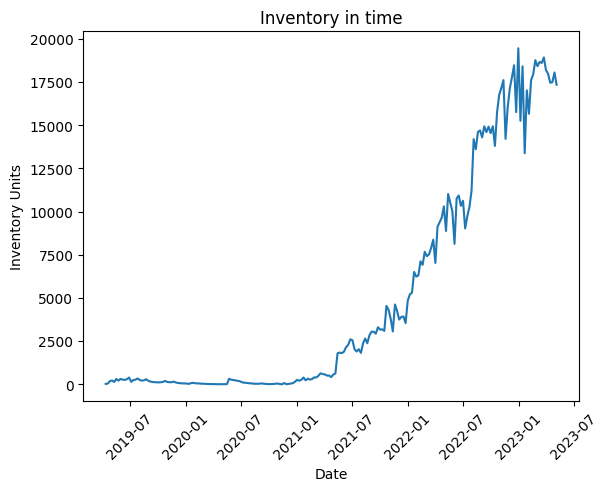

In [154]:
gd = new_df.groupby('date').sum(numeric_only = True)
plt.plot(gd.index, gd.inventory_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Inventory Units')
plt.title('Inventory in time')
plt.show()

In [155]:
new_df = new_df[new_df.year_week > 202101]

new_df = new_df[new_df.year_week > 202101]

#new_df.sort_values(by = 'id').reset_index(drop = True)

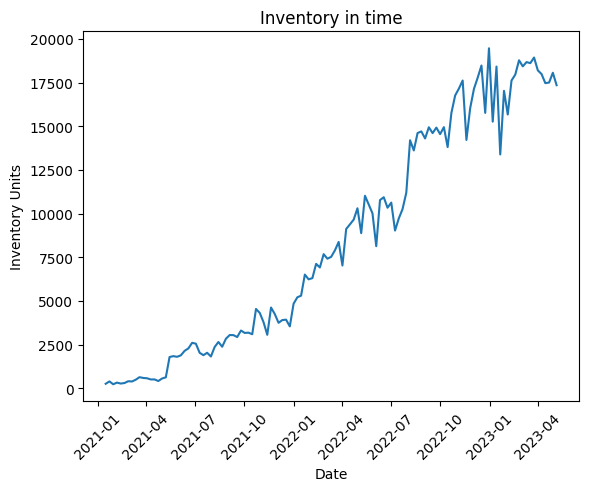

In [156]:
gd = new_df.groupby('date').sum(numeric_only = True)
plt.plot(gd.index, gd.inventory_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Inventory Units')
plt.title('Inventory in time')
plt.show()

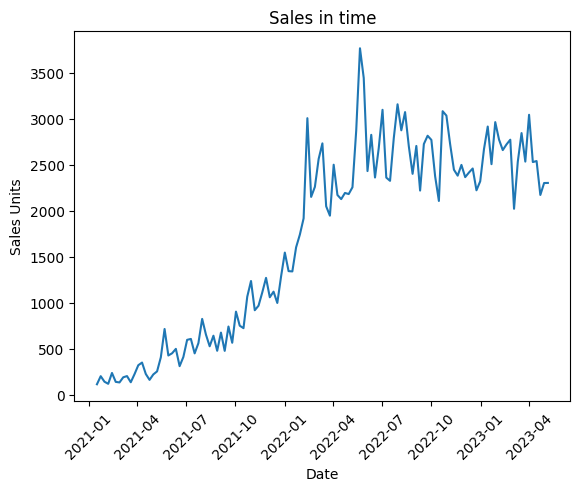

In [157]:
plt.plot(gd.index, gd.sales_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Sales Units')
plt.title('Sales in time')
plt.show()

In [158]:
for i in range(0,len(new_df)-1):
    row = new_df.iloc[i]
    date = row["date"]
    product_number = row["product_number"]
    row2 = new_df.iloc[i+1]
    if row2["product_number"] == product_number:
        diff = row2["date"] - date
        if diff.days > 7:
            p_num = row["product_number"]
            weeks_diff = int(diff.days / 7)
            if weeks_diff <= 3:
                incremento = (row2["sales_units"] -  row["sales_units"]) / (weeks_diff)
                current_date = date
                for k in range(1,weeks_diff):
                    new_row = copy.copy(row)
                    current_date += timedelta(days=7)
                    new_row["date"] = current_date
                    new_row["sales_units"] = row["sales_units"] + k * incremento
                    anho, semana, _ = current_date.isocalendar()
                    new_row["identifier"] = str(anho) + str('{:0>2d}'.format(semana)) + "-" + str(row["product_number"])
                    new_df.loc[i+k-1] = new_row
                    print(len(new_df))

7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7364
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7365
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366
7366


In [159]:
new_df[['sales_units', 'inventory_units', 'year_week']] = new_df[['sales_units', 'inventory_units', 'year_week']].astype(int)

In [160]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year_week,7366.0,202233.459137,55.053522,202102.0,202211.0,202233.0,202252.0,202318.0
product_number,7366.0,124188.745724,79745.105515,6909.0,48363.0,112518.0,196413.0,247737.0
specs,7366.0,110231.173500,64515.195641,967.0,56086.0,108304.0,156654.0,236915.0
display_size,7366.0,15.129623,1.429040,11.0,14.0,15.6,15.6,17.3
sales_units,7366.0,27.886913,29.908239,0.0,4.0,19.0,42.0,186.0
inventory_units,7366.0,139.481401,118.732652,0.0,58.0,112.0,187.0,889.0


In [161]:
error = []
print(new_df.head())
new_df = new_df.reset_index()
for i in range(1,len(new_df)):
  print(i)
  row = new_df.loc[i]
  if row.sales_units + row.inventory_units < new_df.loc[i-1].inventory_units:
      error.append(new_df.loc[i-1].inventory_units - (row.sales_units + row.inventory_units))
      if new_df.loc[i-1].inventory_units - (row.sales_units + row.inventory_units) < 0:
          print(f"Fila {i} tiene un error con una medida de {new_df.loc[i-1].inventory_units - (row.sales_units + row.inventory_units)}")

print("Numero de errores es ", len(error))
print("Min de errores es ", np.array(error).min())
print("Min de errores es ", np.array(error).max())
print("Media de errores es ", np.array(error).mean())
print("Std de errores es ", np.array(error).std())


Se han truncado las últimas 5000 líneas del flujo de salida.
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558

In [162]:
new_df["purchases_units"] =  0

for i in range(1, len(new_df)):
    compras = new_df.at[i, 'inventory_units'] - (new_df.at[i, 'sales_units'] + new_df.at[i-1, 'inventory_units'])
    new_df.at[i, 'purchases_units'] = compras
    
new_df.head()

new_df[new_df.purchases_units <0] = 0

In [163]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,7366.0,1248.535162,2139.523510,0.0,0.0,0.0,1905.75,7540.0
year_week,7366.0,69929.410806,96195.191827,0.0,0.0,0.0,202217.00,202318.0
product_number,7366.0,41800.106571,74335.439866,0.0,0.0,0.0,51324.00,247737.0
specs,7366.0,39024.213141,65977.705563,0.0,0.0,0.0,67690.00,236915.0
display_size,7366.0,5.252023,7.273846,0.0,0.0,0.0,14.00,17.3
sales_units,7366.0,4.798805,12.948075,0.0,0.0,0.0,0.00,155.0
inventory_units,7366.0,61.441624,112.531629,0.0,0.0,0.0,99.00,883.0
purchases_units,7366.0,16.565843,39.729495,0.0,0.0,0.0,13.00,490.0


## Visualización

In [164]:
def datos_atipicos(df, variable, cambio='no'):
    sns.boxplot(x=df[variable])
    q9=np.quantile(df[variable], 0.90)
    q1=np.quantile(df[variable], 0.10)
    iqr=q9-q1
    upper=q9+(1.5*iqr)
    lower=q1-(1.5*iqr)
    outlier=np.append(np.where(df[variable]>upper),np.where(df[variable]<lower))
    if len(outlier)!=0:
        print('Los valores considerados atípicos de la variable se encuentran por encima de',upper, ' o por debajo de',lower)
        print('Hay', len(outlier),'valores poco frecuentes y se encuentran en las posiciones:{}'.format(outlier))
        if cambio=='si':
            df[variable].loc[np.where(df[variable]>upper)]=upper
            df[variable].loc[np.where(df[variable]<lower)]=lower
    else:
        print(' No tiene valores atípicos')

Los valores considerados atípicos de la variable se encuentran por encima de 45.0  o por debajo de -27.0
Hay 184 valores poco frecuentes y se encuentran en las posiciones:[  50  545  549  632  702  764  768  781  823  828  846  894  914  933
  943  956 1222 1308 1310 1316 1323 1328 1339 1344 1520 1525 1608 1621
 1674 1744 1746 1750 1752 1753 1767 1777 2008 2011 2049 2184 2186 2206
 2228 2254 2276 2326 2328 2343 2345 2366 2373 2384 2429 2512 2651 2716
 2717 2720 2733 2802 2875 2893 2910 2985 3006 3044 3209 3329 3370 3376
 3377 3386 3401 3424 3452 3465 3471 3482 3489 3499 3537 3614 3643 3648
 3659 3681 3732 3755 3759 3782 3789 3821 3826 3882 3893 3896 3921 3951
 3959 4072 4106 4134 4136 4178 4183 4184 4196 4200 4202 4205 4206 4209
 4214 4218 4222 4256 4324 4331 4353 4372 4399 4428 4435 4439 4453 4488
 4576 4581 4582 4586 4607 4683 4697 4710 4736 4853 4901 4947 4949 4955
 5012 5082 5233 5303 5364 5402 5416 5464 5510 5664 5671 5679 5723 5809
 5819 5834 5861 5884 5955 5956 6017 6090 6104 61

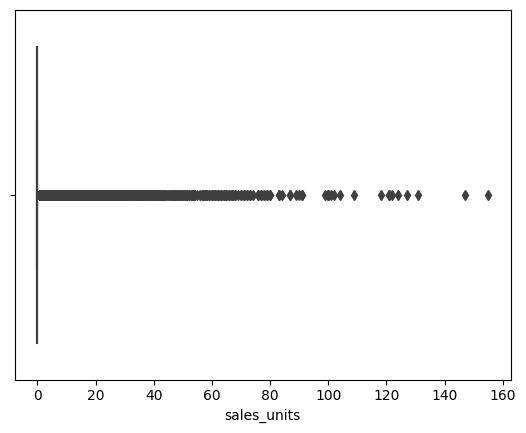

In [165]:
datos_atipicos(new_df, 'sales_units')

Los valores considerados atípicos de la variable se encuentran por encima de 540.0  o por debajo de -324.0
Hay 57 valores poco frecuentes y se encuentran en las posiciones:[ 828  845  846  847  848  849  853  857  861  863  865 1707 1748 1750
 1790 1832 1834 1839 1841 1843 1850 1853 2011 2013 2014 2017 2030 2042
 2043 2046 2049 2052 2057 2060 2061 2062 2431 2432 2433 2436 2444 2446
 2448 3523 3525 3527 3529 3643 3647 3648 3659 3660 3661 3665 5245 5246
 5723]


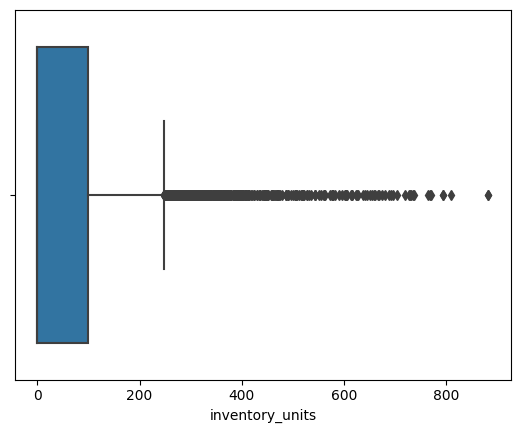

In [166]:
datos_atipicos(new_df, 'inventory_units')

Los valores considerados atípicos de la variable se encuentran por encima de 142.5  o por debajo de -85.5
Hay 158 valores poco frecuentes y se encuentran en las posiciones:[  92  240  251  371  491  551  553  581  590  602  651  811  823  853
  956 1138 1173 1210 1475 1531 1534 1610 1618 1674 1712 1748 1753 1761
 1766 1772 1774 1777 1782 1786 1788 1790 1827 1832 1839 1841 1843 1907
 1916 1935 2013 2054 2116 2196 2228 2292 2300 2427 2432 2443 2452 2481
 3083 3311 3365 3401 3437 3523 3525 3542 3623 3636 3640 3643 3646 3648
 3669 3680 3761 3875 3969 4008 4010 4016 4019 4085 4134 4209 4237 4245
 4309 4327 4343 4433 4439 4551 4607 4629 4859 5068 5113 5189 5212 5213
 5226 5290 5308 5355 5373 5421 5472 5502 5504 5507 5510 5582 5615 5653
 5674 5687 5699 5701 5723 5783 5837 5846 5917 5945 5949 6116 6124 6146
 6157 6165 6168 6230 6244 6265 6276 6286 6326 6386 6388 6390 6478 6571
 6742 6806 6883 6903 6911 6943 6978 7000 7005 7008 7051 7054 7130 7134
 7200 7204 7312 7365]


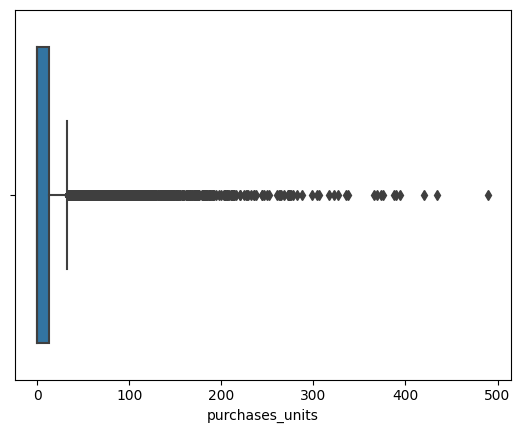

In [167]:
datos_atipicos(new_df, 'purchases_units')

## Normalización

In [168]:
train = new_df

train = train.drop(["date", "id"], axis =1)

Y_train = train.inventory_units
X_train = train.drop("inventory_units", axis = 1)

X_train = pd.get_dummies(X_train, columns=['product_number', 'segment', 'prod_category'])

X_train.dtypes

index                       int64
year_week                   int64
specs                       int64
display_size              float64
sales_units                 int64
                           ...   
prod_category_Clover        uint8
prod_category_Conan         uint8
prod_category_Doraemon      uint8
prod_category_Goku          uint8
prod_category_Luffy         uint8
Length: 119, dtype: object

In [169]:
from sklearn.preprocessing import StandardScaler

num_columns = ["year_week", "display_size", "sales_units", "specs", "purchases_units"]

scaler = StandardScaler()
sub_X_train = X_train[num_columns]
sub_X_train = pd.DataFrame(scaler.fit_transform(sub_X_train), columns=num_columns)

X_train[num_columns] = sub_X_train[num_columns]
X_train

,index,year_week,specs,display_size,sales_units,purchases_units,product_number_0,product_number_6909,product_number_7896,product_number_8883,...,segment_Gaming,segment_Premium,prod_category_0,prod_category_Arale,prod_category_Bobobo,prod_category_Clover,prod_category_Conan,prod_category_Doraemon,prod_category_Goku,prod_category_Luffy
0,0,1.374274,-0.269052,1.106502,-0.216171,-0.416994,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,1,1.374285,-0.269052,1.106502,-0.370644,0.464023,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2,1.374295,-0.269052,1.106502,-0.138934,1.194009,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
3,3,1.374305,-0.269052,1.106502,-0.370644,3.031560,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,4,1.374316,-0.269052,1.106502,-0.370644,1.068149,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7361,7539,1.376322,-0.430284,1.106502,0.092776,-0.391822,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7362,7540,1.376333,-0.430284,1.106502,0.556197,-0.014243,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7363,0,-0.727003,-0.591516,-0.722091,-0.370644,-0.416994,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7364,0,-0.727003,-0.591516,-0.722091,-0.370644,-0.416994,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [170]:
def sliding_window(data, labels, input_width, label_width=1, offset=1):
    x = []
    y = []

    for i in range(len(data)-input_width-label_width-offset):
        _x = data[i:i+input_width]
        _y = labels[i+input_width+offset:i+input_width+offset+label_width]
        x.append(_x)
        y.append(_y)

    x, y = np.array(x),np.array(y)

    if len(x.shape) == 2:
        x = x[:,:,np.newaxis]

    if len(y.shape) == 2:
        y = y[:,:,np.newaxis]
    
    return x, y

In [171]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression()
lm_model.fit(X_train, Y_train)

y_pred = lm_model.predict(X_train)
y_true = Y_train
rms = mean_squared_error(y_true, y_pred, squared=False)
rms

48.867955651031416

## LTSM

In [172]:
import tensorflow as tf

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=64, return_sequences=True), 
    tf.keras.layers.LSTM(units=32, return_sequences=True), 
    tf.keras.layers.LSTM(units=32, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])